In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("50_Startups.csv")

In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [4]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [6]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend',
       'State_Florida', 'State_New York']]

In [7]:
dependent=dataset[['Profit']]

In [8]:
dependent

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [58]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='best')
regressor=regressor.fit(x_train,y_train)

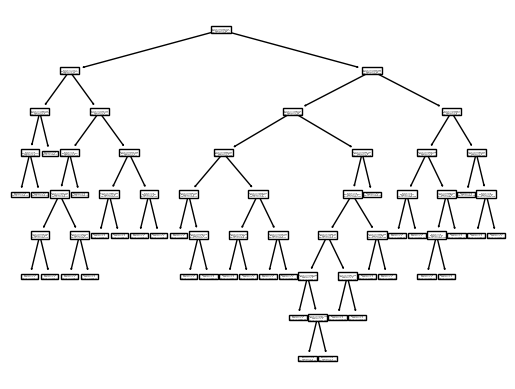

In [59]:
#this library helps for graph view
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [60]:
y_pred=regressor.predict(x_test)

In [61]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [62]:
r_score

0.9453830766475363

In [64]:
import pickle
filename="finalized_DT_poisson_model.sav"
pickle.dump(regressor,open(filename,'wb'))

In [65]:
loaded_model=pickle.load(open("finalized_DT_poisson_model.sav",'rb'))
result=loaded_model.predict([[19890,59800,21345,1,0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [66]:
result

array([49490.75])